![BTS](https://github.com/vfp1/bts-dsf-2020/raw/main/Logo-BTS.jpg)

# Final Project Notebook
### Author: Carlos Varela

## Understand the Problem and the Data

The alarming increase of emergencies due to mental health conditions has emerged as a pressing public health concern in Mexico, with profound implications for individuals, families, and society at large.

A significant body of research has explored various risk factors contributing to mental health emergencies among Mexicans. For instance, according to the Mexican government's "Informe sobre la Situación de la Salud Mental y el Consumo de Sustancias Psicoactivas en México 2021", substance use not only results in mental health disorders but also leads to medical emergencies and fatalities related to consumption. Alcohol remains the substance most commonly associated with these conditions, highlighting the urgent need for public policies to address this issue. This finding underscores the complex interplay between substance use disorders and mental health issues, highlighting the need for targeted prevention strategies and support mechanisms.

As observed in the report, mental and behavioral disorders, such as major depressive disorder, anxiety disorders, bipolar disorder, schizophrenia, and dysthymia, contribute significantly to the disease burden.

In light of the alarming statistic indicating that the consumption of alcohol and tobacco remain a critical concern, there is an urgent need to develop tools to help healthcare professionals and patients to monitor their wellbeing. For this reason, we will be developing a classification algorithm focused on classifying emergencies derived from Anxiety, Depression, or drug abuse. Thus, supporting the development of preventive care technologies. This algorithm aims to identify the mental health condition leading to emergencies within this demographic cohort. By leveraging the available data, the algorithm will help healthcare professionals and support services intervene proactively, thereby mitigating the impact of this significant public health issue and potentially saving lives.

**Dataset**

For this project we will be using a real-world dataset provided by Centro de Integracion Juvenil and Mexico´s Government. The dataset can be found in the following official link:
https://datos.gob.mx/busca/dataset/pacientes-de-primera-vez/resource/8a0005e9-cea9-402f-be72-df1cb51b5518

The dataset contians patient information attended for the first time for substance use and other mental health problems during the 1st quarter of 2024.

**Disclaimer**

The data has been marked as publically available and "free to use" as published in the Open Data Portal from the Government of Mexico: https://datos.gob.mx/busca/dataset

## Exploratory Data Analysis 1.0 - Importing and Inspecting the Data

We will begin this analysis by loading the data and inspecting it to learn more about the composition of the dataset. We will use pandas to load the data as a dataframe. Our first approach will be the visually inspect the data that we will be dealing with as well as making some sense out of each feature.

### Installing Dependencies

To use all the mentioned libraries and classes in a Jupyter notebook, you need to install several dependencies. Below is a list of all the dependencies and the command to install them.

**Dependencies:**

- pandas
- numpy
- matplotlib
- seaborn
- scipy
- scikit-learn
- pickle (part of Python's standard library, no need to install)
- tensorflow
- imbalanced-learn

Run this command to install all pip libraries:

!pip install pandas numpy matplotlib seaborn scipy scikit-learn tensorflow imbalanced-learn


In [1]:
# Importing necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading the data:
raw_data = pd.read_csv('pacientes1erIngresoatratamiento.csv', encoding = 'latin-1')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9333 entries, 0 to 9332
Data columns (total 36 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   ANIO                               9333 non-null   int64 
 1   ID_CENTRO                          9333 non-null   int64 
 2   NOMBRE_CENTRO                      9333 non-null   object
 3   ID_SEXO                            9333 non-null   int64 
 4   SEXO                               9333 non-null   object
 5   ID_EDAD                            9333 non-null   int64 
 6   EDAD                               9333 non-null   object
 7   ID_ESTADO_CONYUGAL                 9333 non-null   int64 
 8   ESTADO_CONYUGAL                    9333 non-null   object
 9   ID_ESCOLARIDAD                     9333 non-null   int64 
 10  ESCOLARIDAD                        9333 non-null   object
 11  ID_OCUPACION                       9333 non-null   int64 
 12  OCUPAC

In [3]:
# inspecting the first 5 rows of the dataset:
raw_data.head(5)

,ANIO,ID_CENTRO,NOMBRE_CENTRO,ID_SEXO,SEXO,ID_EDAD,EDAD,ID_ESTADO_CONYUGAL,ESTADO_CONYUGAL,ID_ESCOLARIDAD,...,OPIOIDES,OPIO/FENTANILO,SUST CON UTIL MEDICA,OTROS,NO CLASIFICADAS,SIN CONSUMO,ID_MOTIVO,MOTIVO,ID_SIMPACTO,SIMPACTO
0,2024,9010,CJ PACHUCA,1,HOMBRE,3,15_19,1,SOLTERO,3,...,0,0,0,0,0,0,1,DROGAS,6,ESTIMULANTES DE TIPO ANFETAMINICO
1,2024,9010,CJ PACHUCA,2,MUJER,4,20_24,1,SOLTERO,6,...,0,0,0,0,0,0,1,DROGAS,6,ESTIMULANTES DE TIPO ANFETAMINICO
2,2024,9010,CJ PACHUCA,2,MUJER,7,35_98,2,CASADO,3,...,0,0,0,0,0,1,13,ANSIEDAD,17,SIN CONSUMO
3,2024,9010,CJ PACHUCA,1,HOMBRE,3,15_19,1,SOLTERO,3,...,0,0,0,0,0,0,1,DROGAS,2,ALCOHOL
4,2024,9010,CJ PACHUCA,1,HOMBRE,3,15_19,1,SOLTERO,4,...,0,0,0,0,0,1,9,MCONN,17,SIN CONSUMO


**Making some sense of the data**

Below we have a data dictionary for our dataset columns:

- **Column Name**: YEAR  
  **Data Type**: Numeric  
  **Description**: Year of patient's attention

- **Column Name**: CENTER_ID  
  **Data Type**: Numeric  
  **Description**: Attention center key

- **Column Name**: CENTER_NAME  
  **Data Type**: Text  
  **Description**: Center name

- **Column Name**: SEX_ID  
  **Data Type**: Numeric  
  **Description**: Patient's sex key

- **Column Name**: SEX  
  **Data Type**: Text  
  **Description**: Patient's sex

- **Column Name**: AGE_ID  
  **Data Type**: Numeric  
  **Description**: Patient's age key

- **Column Name**: AGE  
  **Data Type**: Text  
  **Description**: Patient's age

- **Column Name**: MARITAL_STATUS_ID  
  **Data Type**: Numeric  
  **Description**: Patient's marital status key

- **Column Name**: MARITAL_STATUS  
  **Data Type**: Text  
  **Description**: Patient's marital status

- **Column Name**: EDUCATION_ID  
  **Data Type**: Numeric  
  **Description**: Patient's education key

- **Column Name**: EDUCATION  
  **Data Type**: Text  
  **Description**: Patient's education

- **Column Name**: OCCUPATION_ID  
  **Data Type**: Numeric  
  **Description**: Patient's occupation key

- **Column Name**: OCCUPATION  
  **Data Type**: Text  
  **Description**: Patient's occupation

- **Column Name**: CONSUMPTION_TYPE_ID  
  **Data Type**: Numeric  
  **Description**: Patient's consumption type key

- **Column Name**: CONSUMPTION_TYPE  
  **Data Type**: Text  
  **Description**: Patient's consumption type

- **Column Name**: TOBACCO  
  **Data Type**: Numeric  
  **Description**: Smokes tobacco (1 - Yes, 2 - No)

- **Column Name**: ALCOHOL  
  **Data Type**: Numeric  
  **Description**: Consumes alcohol (1 - Yes, 2 - No)

- **Column Name**: CANNABIS/MARIJUANA  
  **Data Type**: Numeric  
  **Description**: Consumes cannabis/marijuana (1 - Yes, 2 - No)

- **Column Name**: COCAINE  
  **Data Type**: Numeric  
  **Description**: Consumes cocaine (1 - Yes, 2 - No)

- **Column Name**: STIMULANTS/AMPHETAMINES  
  **Data Type**: Numeric  
  **Description**: Consumes stimulants/amphetamines (1 - Yes, 2 - No)

- **Column Name**: AMPHETAMINE_TYPE_STIMULANTS  
  **Data Type**: Numeric  
  **Description**: Consumes amphetamine type stimulants (1 - Yes, 2 - No)

- **Column Name**: OTHER_STIMULANTS  
  **Data Type**: Numeric  
  **Description**: Consumes other stimulants (1 - Yes, 2 - No)

- **Column Name**: INHALANTS  
  **Data Type**: Numeric  
  **Description**: Consumes inhalants (1 - Yes, 2 - No)

- **Column Name**: HALLUCINOGENS  
  **Data Type**: Numeric  
  **Description**: Consumes hallucinogens (1 - Yes, 2 - No)

- **Column Name**: CNS_DEPRESSANTS  
  **Data Type**: Numeric  
  **Description**: Consumes CNS depressants (1 - Yes, 2 - No)

- **Column Name**: OPIUM  
  **Data Type**: Numeric  
  **Description**: Consumes opium (1 - Yes, 2 - No)

- **Column Name**: OPIOIDS  
  **Data Type**: Numeric  
  **Description**: Consumes opioids (1 - Yes, 2 - No)

- **Column Name**: OPIUM/FENTANYL  
  **Data Type**: Numeric  
  **Description**: Consumes opium/fentanyl (1 - Yes, 2 - No)

- **Column Name**: MEDICALLY_USED_SUBSTANCES  
  **Data Type**: Numeric  
  **Description**: Consumes medically used substances (1 - Yes, 2 - No)

- **Column Name**: OTHERS  
  **Data Type**: Numeric  
  **Description**: Consumes others (1 - Yes, 2 - No)

- **Column Name**: NOT_CLASSIFIED  
  **Data Type**: Numeric  
  **Description**: Consumes not classified substances (1 - Yes, 2 - No)

- **Column Name**: NO_CONSUMPTION  
  **Data Type**: Numeric  
  **Description**: No substance consumption (1 - Yes, 2 - No)

- **Column Name**: CONSULTATION_REASON_ID  
  **Data Type**: Numeric  
  **Description**: Patient's consultation reason key

- **Column Name**: CONSULTATION_REASON  
  **Data Type**: Text  
  **Description**: Patient's consultation reason type

- **Column Name**: IMPACT_ID  
  **Data Type**: Numeric  
  **Description**: Key drug with highest impact (1 - Yes, 2 - No)

- **Column Name**: IMPACT  
  **Data Type**: Text  
  **Description**: Type of drug with highest impact


In [4]:
# describing numerical values:
raw_data.describe()

,ANIO,ID_CENTRO,ID_SEXO,ID_EDAD,ID_ESTADO_CONYUGAL,ID_ESCOLARIDAD,ID_OCUPACION,ID_CONSUMO,TABACO,ALCOHOL,...,DEPRESORES DEL SNC,OPIO,OPIOIDES,OPIO/FENTANILO,SUST CON UTIL MEDICA,OTROS,NO CLASIFICADAS,SIN CONSUMO,ID_MOTIVO,ID_SIMPACTO
count,9333.0,9333.000000,9333.000000,9333.000000,9333.000000,9333.000000,9333.000000,9333.000000,9333.000000,9333.000000,...,9333.000000,9333.000000,9333.000000,9333.000000,9333.000000,9333.000000,9333.000000,9333.000000,9333.000000,9333.000000
mean,2024.0,9532.318976,1.423229,4.685846,1.750563,3.816886,3.251366,1.550841,0.532198,0.644380,...,0.057752,0.016822,0.003857,0.013929,0.010286,0.013608,0.016501,0.205079,4.647059,4.940534
std,0.0,269.687552,0.496693,3.778321,1.259908,1.270442,1.893949,1.668302,0.498989,0.478726,...,0.233287,0.128611,0.061990,0.117203,0.100903,0.115862,0.127397,0.403781,4.301105,5.818258
min,2024.0,9010.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2024.0,9351.000000,1.000000,3.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,2024.0,9511.000000,1.000000,4.000000,1.000000,4.000000,4.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000
75%,2024.0,9734.000000,2.000000,7.000000,2.000000,4.000000,4.000000,3.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,6.000000
max,2024.0,9953.000000,2.000000,99.000000,6.000000,7.000000,8.000000,5.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000,17.000000


#### Conclusion

**Dataset Inspection**

- The dataset contains 36 columns and 9333 records. 
- 9 of these columns represent IDs. 
- The data only contains records for 2024. 
- 34 out of the 35 features are categorical. 
- The use of substances per individual have been encoded using 0 for not consumed and 1 for consumed. 
- Age has been reported with bins rather than actual age.

**Descriptive statistics:** 

In this dataset, several features do not have meaningful statistical measures because they are either binary encodings (0-1) or ID values representing categorical variables.

The statistical measures provided for these features such as mean, standard deviation, minimum, maximum, etc., may not be meaningful in the context of these features due to their nature as encodings or identifiers. Therefore, we will be using categorical analysis mainly. 

Our target variable will be the "MOTIVO" column, therefore, cleaning and preparation is needed to continue with the analysis.

## Exploratory Data Analysis 1.1 Handling Missing & Duplicated Values.

In [5]:
# Inspecting columns with missing values:
for column in raw_data.columns:
    missing_values = raw_data[column].isna().sum()
    if missing_values != 0:
        print(f'missing values for column {column}: {missing_values}')

missing values for column MOTIVO: 4


Since the column Motivo is the only one that contain nulls we can handle it right away. We could handle the missing values by using the mode of the set. However, We will delete the 4 records from the set as these are not sufficient to impact our analysis. 

In [6]:
# Removing nulls:
raw_data.dropna(inplace = True)

print('Records count after removing nulls: ',raw_data['MOTIVO'].count())

Records count after removing nulls:  9329


In [7]:
# Identifying duplicates:
duplicates = raw_data.duplicated().sum()

print('Number of duplicates found: ', duplicates)
print()
print('Inspecting records:')
raw_data[raw_data.duplicated()]

Number of duplicates found:  491

Inspecting records:


,ANIO,ID_CENTRO,NOMBRE_CENTRO,ID_SEXO,SEXO,ID_EDAD,EDAD,ID_ESTADO_CONYUGAL,ESTADO_CONYUGAL,ID_ESCOLARIDAD,...,OPIOIDES,OPIO/FENTANILO,SUST CON UTIL MEDICA,OTROS,NO CLASIFICADAS,SIN CONSUMO,ID_MOTIVO,MOTIVO,ID_SIMPACTO,SIMPACTO
35,2024,9010,CJ PACHUCA,1,HOMBRE,3,15_19,1,SOLTERO,4,...,0,0,0,0,0,1,9,MCONN,17,SIN CONSUMO
41,2024,9010,CJ PACHUCA,1,HOMBRE,2,10_14,1,SOLTERO,3,...,0,0,0,0,0,1,9,MCONN,17,SIN CONSUMO
44,2024,9010,CJ PACHUCA,2,MUJER,3,15_19,1,SOLTERO,4,...,0,0,0,0,0,0,9,MCONN,0,SIN DATO
66,2024,9010,CJ PACHUCA,1,HOMBRE,3,15_19,1,SOLTERO,4,...,0,0,0,0,0,0,2,ALCOHOL,2,ALCOHOL
85,2024,9010,CJ PACHUCA,1,HOMBRE,3,15_19,1,SOLTERO,4,...,0,0,0,0,0,0,2,ALCOHOL,2,ALCOHOL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9187,2024,9952,CJ CHETUMAL,2,MUJER,3,15_19,1,SOLTERO,4,...,0,0,0,0,0,1,6,DEPRESION,17,SIN CONSUMO
9254,2024,9952,CJ CHETUMAL,2,MUJER,3,15_19,1,SOLTERO,4,...,0,0,0,0,0,1,13,ANSIEDAD,17,SIN CONSUMO
9256,2024,9952,CJ CHETUMAL,2,MUJER,3,15_19,1,SOLTERO,4,...,0,0,0,0,0,1,13,ANSIEDAD,0,SIN DATO
9321,2024,9953,CJ PLAYA DEL CARMEN,2,MUJER,7,35_98,2,CASADO,4,...,0,0,0,0,0,0,13,ANSIEDAD,0,SIN DATO


## Exploratory Data Analysis 1.2 - 1.3 Exploring Data Characteristics & Visualizing Data Relationships

We will start by wrangling our dataset for analysis.
- Changing the column names to match our dictionary
- Provide an identifier for our label/target column
- Removing ID-related columns as they are not within the scope of our transformations

In [8]:
# Changing the column names:
new_names = {
    'ANIO': 'YEAR',
    'ID_CENTRO': 'ID_CENTER',
    'NOMBRE_CENTRO': 'CENTER_NAME',
    'ID_SEXO': 'ID_SEX',
    'SEXO': 'SEX',
    'ID_EDAD': 'ID_AGE',
    'EDAD': 'AGE',
    'ID_ESTADO_CONYUGAL': 'ID_MARITAL_STATUS',
    'ESTADO_CONYUGAL': 'MARITAL_STATUS',
    'ID_ESCOLARIDAD': 'ID_EDUCATION',
    'ESCOLARIDAD': 'EDUCATION',
    'ID_OCUPACION': 'ID_JOB',
    'OCUPACION': 'JOB',
    'ID_CONSUMO': 'ID_CONSUMPTION',
    'TIPO_CONSUMO': 'CONSUMPTION_TYPE',
    'TABACO': 'TOBACO',
    'ALCOHOL': 'ALCOHOL',
    'CANNABIS/MARIGUANA': 'CANNABIS_MARIGUANA',
    'COCAINA': 'COCAINE',
    'ESTIMULANTES/ANFETAMINAS': 'ANFETAMINE_STIMULANTS',
    'ESTIMULANTES DE TIPO ANFETAMINICO': 'ANFETAMINE_LIKE_STIMULANTS',
    'ESTIMULANTES OTROS': 'OTHER_STIMULANTS',
    'INHALABLES': 'INHALABLES',
    'ALUCINOGENOS': 'ALUCINOGENS',
    'DEPRESORES DEL SNC': 'SNC_DEPRESORS',
    'OPIO': 'OPIUM',
    'OPIOIDES': 'OPIOIDS',
    'OPIO/FENTANILO': 'OPIUM_FENTANYLE',
    'SUST CON UTIL MEDICA': 'DRUG_OF_CLINICAL_USE',
    'OTROS': 'OTHERS',
    'NO CLASIFICADAS': 'NOT_CLASSIFIED',
    'SIN CONSUMO': 'WITHOUT_CONSUMPTION',
    'ID_MOTIVO': 'ID_MOTIVE',
    'MOTIVO': 'TARGET', # Provide an identifier for our label/target column...
    'ID_SIMPACTO': 'ID_S_IMPACT',
    'SIMPACTO': 'S_IMPACT'
}

raw_data.rename(columns=new_names, inplace=True)
wrangled_set = raw_data.copy() # create a new instance of our dataframe for analysis
wrangled_set.columns

Index(['YEAR', 'ID_CENTER', 'CENTER_NAME', 'ID_SEX', 'SEX', 'ID_AGE', 'AGE',
       'ID_MARITAL_STATUS', 'MARITAL_STATUS', 'ID_EDUCATION', 'EDUCATION',
       'ID_JOB', 'JOB', 'ID_CONSUMPTION', 'CONSUMPTION_TYPE', 'TOBACO',
       'ALCOHOL', 'CANNABIS_MARIGUANA', 'COCAINE', 'ANFETAMINE_STIMULANTS',
       'ANFETAMINE_LIKE_STIMULANTS', 'OTHER_STIMULANTS', 'INHALABLES',
       'ALUCINOGENS', 'SNC_DEPRESORS', 'OPIUM', 'OPIOIDS', 'OPIUM_FENTANYLE',
       'DRUG_OF_CLINICAL_USE', 'OTHERS', 'NOT_CLASSIFIED',
       'WITHOUT_CONSUMPTION', 'ID_MOTIVE', 'TARGET', 'ID_S_IMPACT',
       'S_IMPACT'],
      dtype='object')

In [9]:
# Removing out-of-scope ID-related columns:
for column in wrangled_set.columns:
    if 'ID_' in column:
        wrangled_set.drop(column, axis=1, inplace=True)
        print(f'Column {column} removed')

# Display changes:
wrangled_set.head(1)

Column ID_CENTER removed
Column ID_SEX removed
Column ID_AGE removed
Column ID_MARITAL_STATUS removed
Column ID_EDUCATION removed
Column ID_JOB removed
Column ID_CONSUMPTION removed
Column ID_MOTIVE removed
Column ID_S_IMPACT removed


,YEAR,CENTER_NAME,SEX,AGE,MARITAL_STATUS,EDUCATION,JOB,CONSUMPTION_TYPE,TOBACO,ALCOHOL,...,SNC_DEPRESORS,OPIUM,OPIOIDS,OPIUM_FENTANYLE,DRUG_OF_CLINICAL_USE,OTHERS,NOT_CLASSIFIED,WITHOUT_CONSUMPTION,TARGET,S_IMPACT
0,2024,CJ PACHUCA,HOMBRE,15_19,SOLTERO,SECUNDARIA,TRABAJO INESTABLE,FUNCIONAL,1,1,...,0,0,0,0,0,0,0,0,DROGAS,ESTIMULANTES DE TIPO ANFETAMINICO


Now we will eliminate all the columns containing missing information but labelled as "SIN DATO" (No datum).

In [10]:
# Drop rows with 'SIN DATO' in any column
cleaned_set = wrangled_set[~wrangled_set.applymap(lambda x: x == 'SIN DATO').any(axis=1)]

Now that we have a dataframe ready for analysis we will start **exploring** some **data characteristics** using crosstab charts and different visuals. The idea is to explore the relationships and content of our features before modeling.

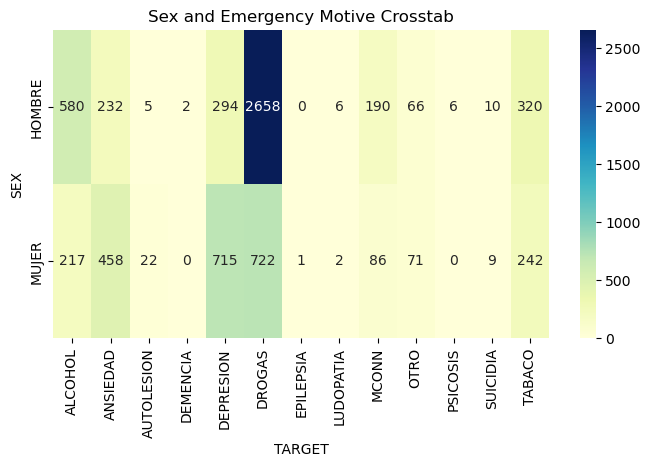

In [11]:
import seaborn as sns
# Create a crosstab tables for two categorical variables:
crosstab_table_1 = pd.crosstab(cleaned_set['SEX'], cleaned_set['TARGET'])
crosstab_table_2 = pd.crosstab(cleaned_set['AGE'], cleaned_set['TARGET'])
crosstab_table_3 = pd.crosstab(cleaned_set['EDUCATION'], cleaned_set['TARGET'])
crosstab_table_4 = pd.crosstab(cleaned_set['MARITAL_STATUS'], cleaned_set['TARGET'])
crosstab_table_5 = pd.crosstab(cleaned_set['JOB'], cleaned_set['TARGET'])


# Plotting the crosstab using heatmap:
plt.figure(figsize=(8, 4))
sns.heatmap(crosstab_table_1, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Sex and Emergency Motive Crosstab')
plt.xlabel('TARGET')
plt.ylabel('SEX')
plt.show()

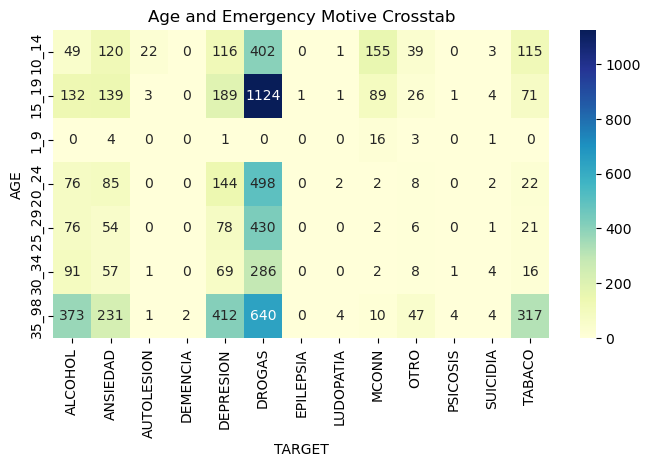

In [12]:
# Plotting the crosstab using heatmap:
plt.figure(figsize=(8, 4))
sns.heatmap(crosstab_table_2, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Age and Emergency Motive Crosstab')
plt.xlabel('TARGET')
plt.ylabel('AGE')
plt.show()

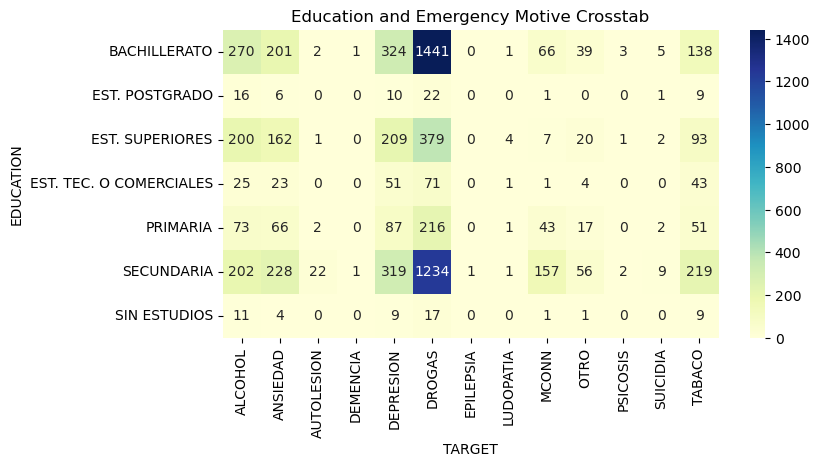

In [13]:
# Plotting the crosstab using heatmap:
plt.figure(figsize=(8, 4))
sns.heatmap(crosstab_table_3, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Education and Emergency Motive Crosstab')
plt.xlabel('TARGET')
plt.ylabel('EDUCATION')
plt.show()

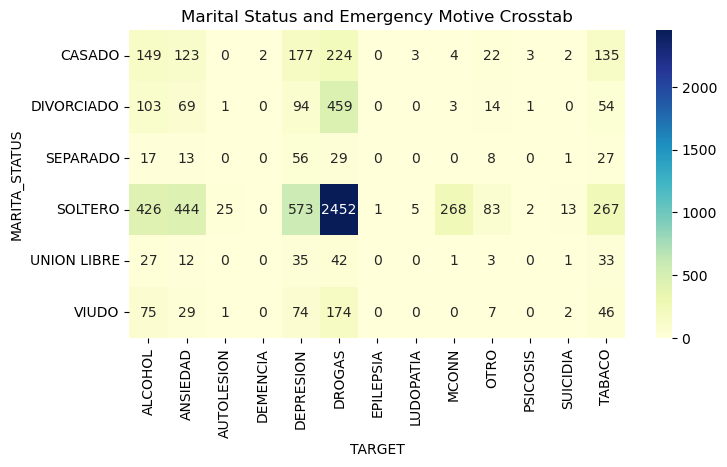

In [14]:
plt.figure(figsize=(8, 4))
sns.heatmap(crosstab_table_4, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Marital Status and Emergency Motive Crosstab')
plt.xlabel('TARGET')
plt.ylabel('MARITA_STATUS')
plt.show()

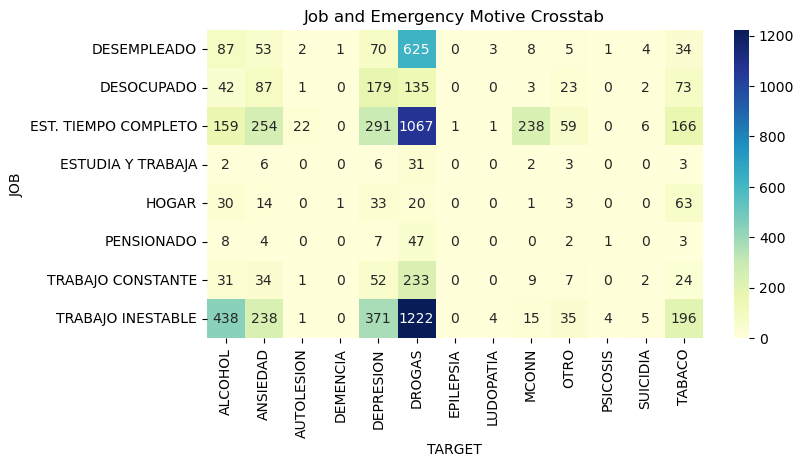

In [15]:
plt.figure(figsize=(8, 4))
sns.heatmap(crosstab_table_5, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Job and Emergency Motive Crosstab')
plt.xlabel('TARGET')
plt.ylabel('JOB')
plt.show()

**Profiling feature dependance and correlation**

In the next segment, we will inspect the correlation between the consumption of different drugs and our target variable. We will also inspect the correlation between the target and the other features. Finally, we will profile the data by plotting groups and behaviors.

In [16]:
cleaned_set.columns

Index(['YEAR', 'CENTER_NAME', 'SEX', 'AGE', 'MARITAL_STATUS', 'EDUCATION',
       'JOB', 'CONSUMPTION_TYPE', 'TOBACO', 'ALCOHOL', 'CANNABIS_MARIGUANA',
       'COCAINE', 'ANFETAMINE_STIMULANTS', 'ANFETAMINE_LIKE_STIMULANTS',
       'OTHER_STIMULANTS', 'INHALABLES', 'ALUCINOGENS', 'SNC_DEPRESORS',
       'OPIUM', 'OPIOIDS', 'OPIUM_FENTANYLE', 'DRUG_OF_CLINICAL_USE', 'OTHERS',
       'NOT_CLASSIFIED', 'WITHOUT_CONSUMPTION', 'TARGET', 'S_IMPACT'],
      dtype='object')

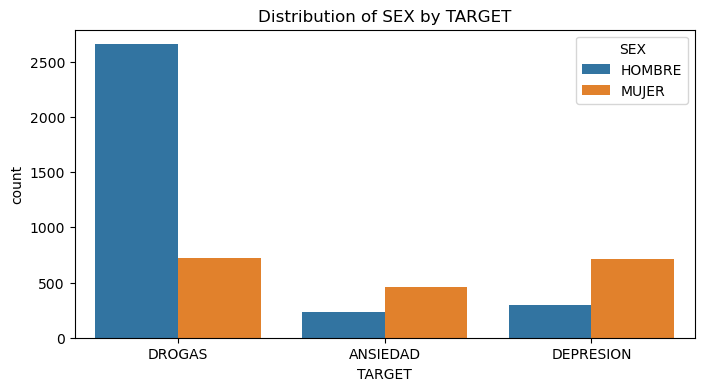

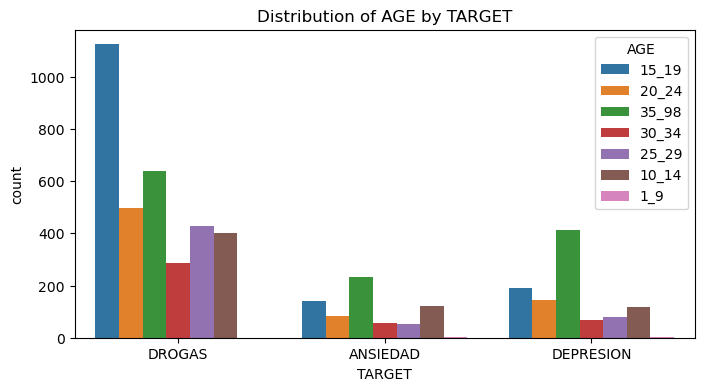

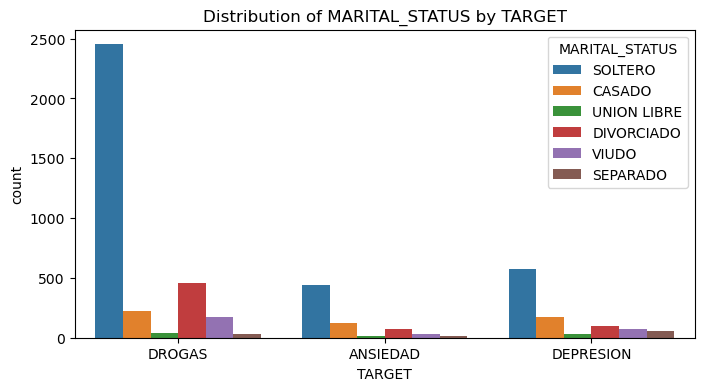

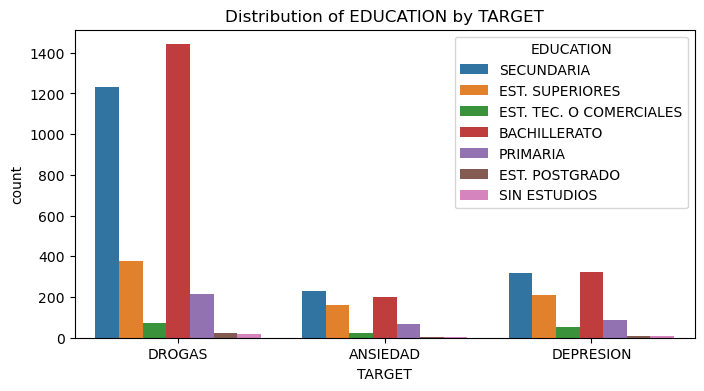

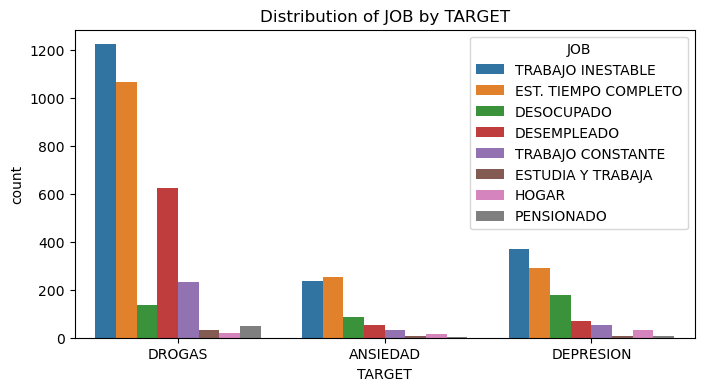

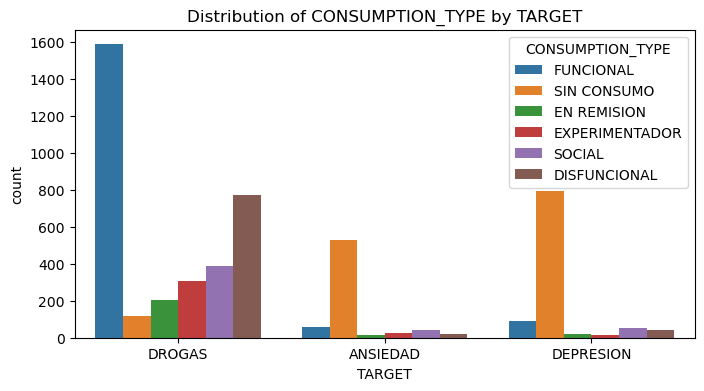

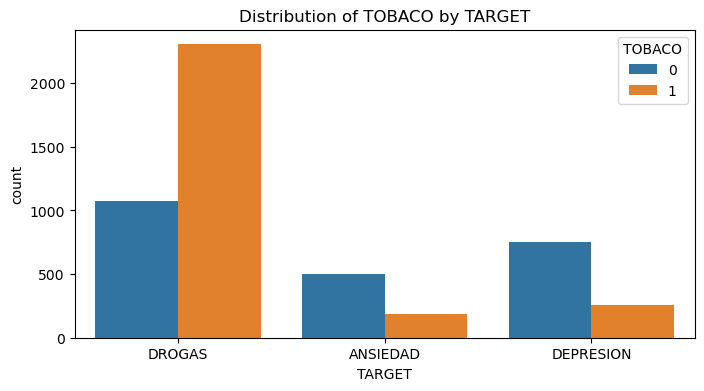

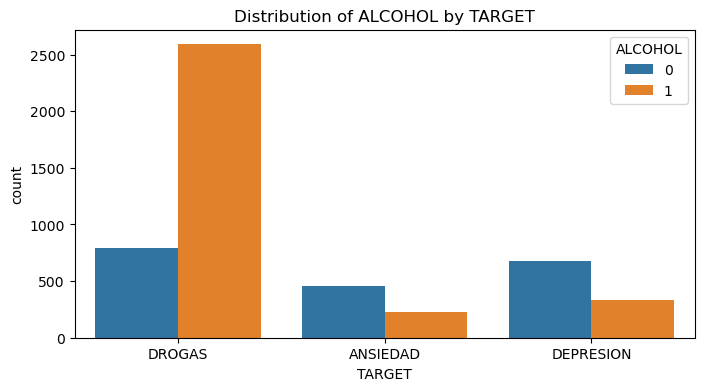

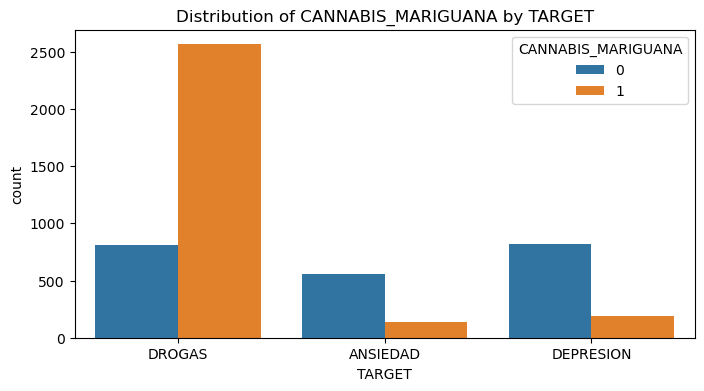

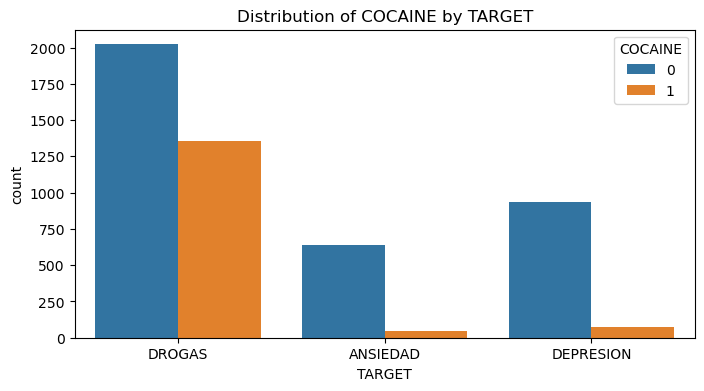

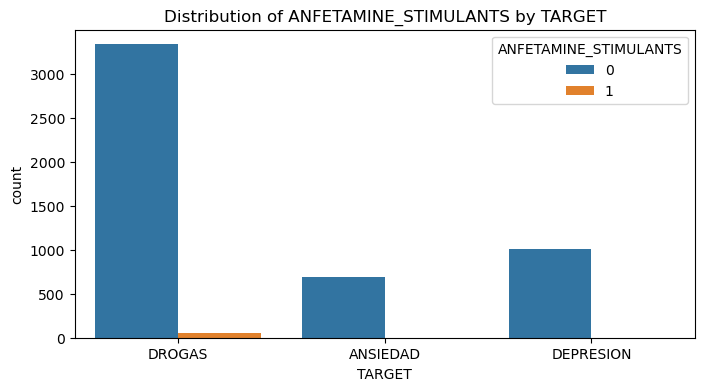

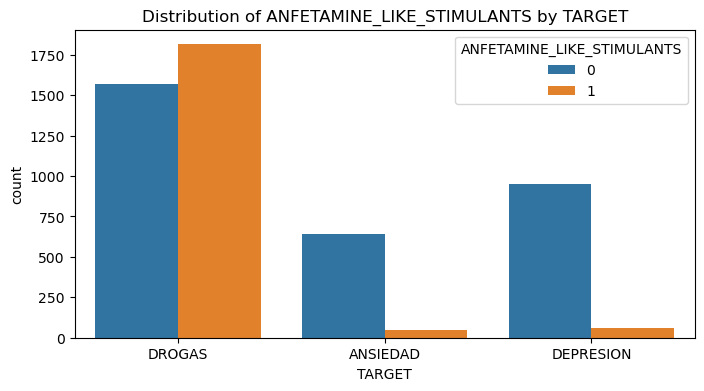

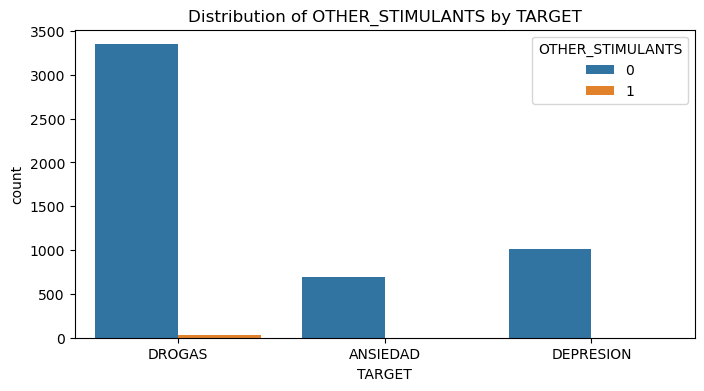

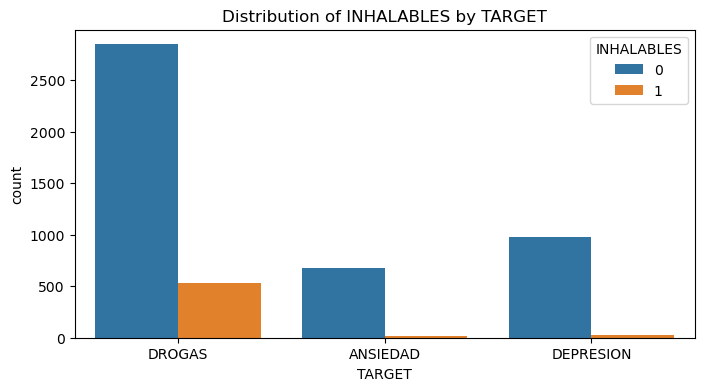

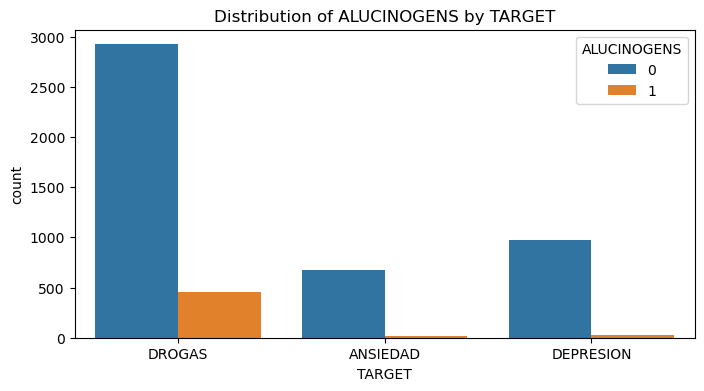

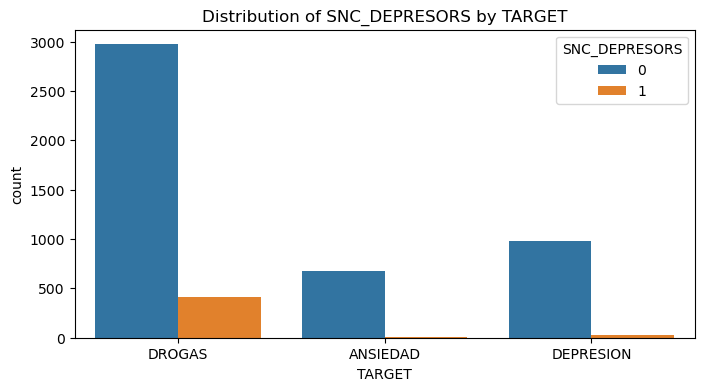

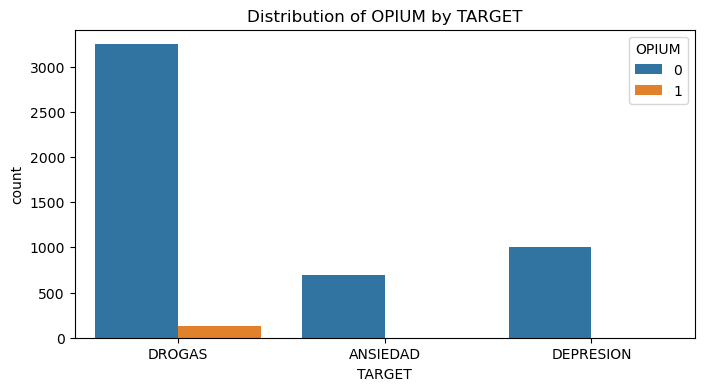

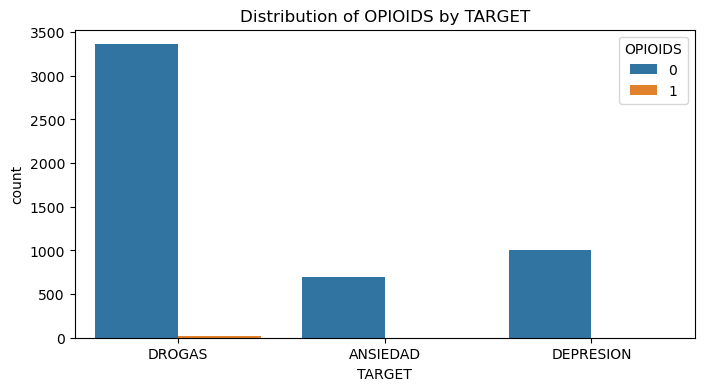

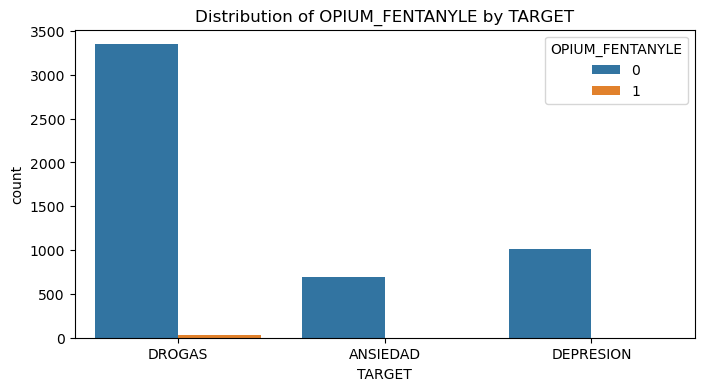

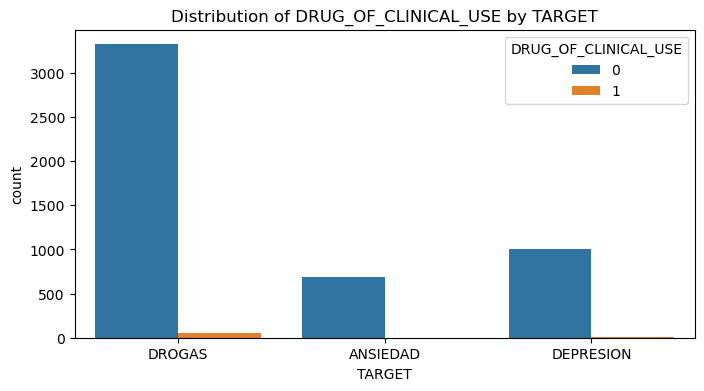

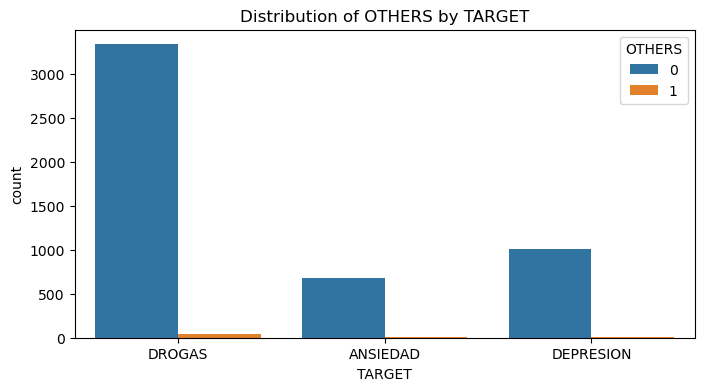

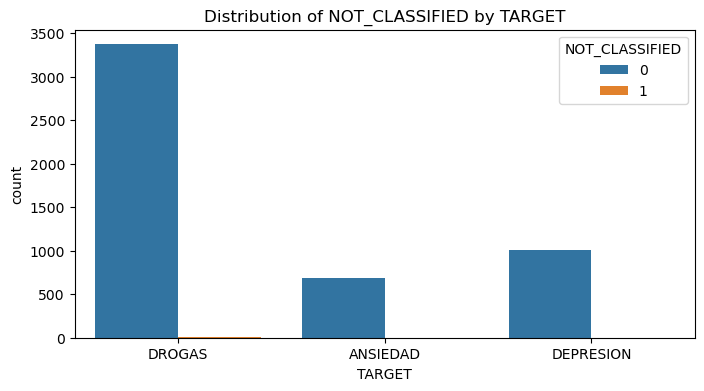

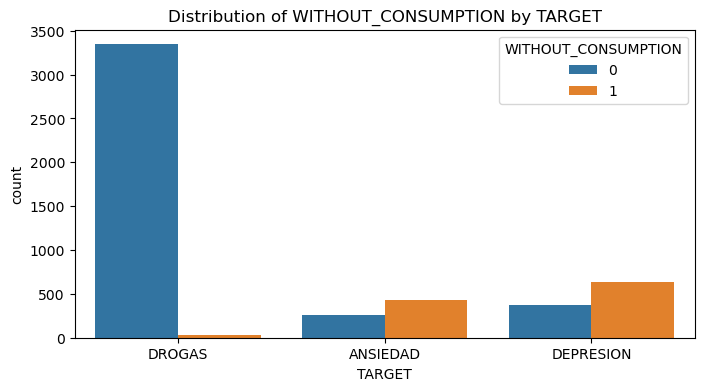

In [17]:
# Bar plots for each indicator against the target variable:
def plot_indicators(df, boolean_columns, target_column):
    for col in boolean_columns:
        plt.figure(figsize=(8, 4))
        sns.countplot(x=target_column, hue=col, data=df)
        plt.title(f'Distribution of {col} by {target_column}')
        plt.show()

boolean_columns = ['SEX', 'AGE', 'MARITAL_STATUS', 'EDUCATION',
       'JOB', 'CONSUMPTION_TYPE', 'TOBACO', 'ALCOHOL', 'CANNABIS_MARIGUANA',
       'COCAINE', 'ANFETAMINE_STIMULANTS', 'ANFETAMINE_LIKE_STIMULANTS',
       'OTHER_STIMULANTS', 'INHALABLES', 'ALUCINOGENS', 'SNC_DEPRESORS',
       'OPIUM', 'OPIOIDS', 'OPIUM_FENTANYLE', 'DRUG_OF_CLINICAL_USE', 'OTHERS',
       'NOT_CLASSIFIED', 'WITHOUT_CONSUMPTION']

# Plot the distribution for only depression, anxiety, and drugs:
cleaned_df_subset = cleaned_set[(cleaned_set['TARGET'] == 'DEPRESION') | 
                               (cleaned_set['TARGET'] == 'ANSIEDAD') |
                              (cleaned_set['TARGET'] == 'DROGAS')]

plot_indicators(cleaned_df_subset, boolean_columns, 'TARGET')

cleaned_df_subset will become our dataset for modeling since we are only interested in determining if the emergency falls into depresion, anxiety or drug related issues. Therefore, the next part of the analysis will manipulate the cleaned_df_subset dataframe.

To inspect the correlation of categorical variables, we will perform the following pipeline:
- For each feature, we create a contingency table with the TARGET column.
- Then, we perform the Chi-Square test using chi2_contingency from spacy.
- Finally, we will store the p-values, which indicate the strength of the association between each indicator and the target variable.

We can reject the hypothesis that the two variables being tested are independent if the p-value is well below 5%

We can also measure the level of correlation between the two variables using Cramer’s V statistical method. This is calculated using the test statistic, the degree of freedom and the dimensions of the contingency table. It returns a value between 0 and 1. If the value returned is greater than 0.9, the relationship can be described as very strong. If the value is less than 0.10, the relationship can be described as weak.

In [18]:
from scipy.stats import chi2_contingency

# Function to calculate chi-square test:
def chi_square_test(dataframe, boolean_columns, target_column):
    chi2_results = {}
    for col in boolean_columns:
        contingency_table = pd.crosstab(dataframe[col], dataframe[target_column])
        chi2, p, dof, ex = chi2_contingency(contingency_table)
        chi2_results[col] = p
    return chi2_results

                                  p_value
SEX                         4.014952e-240
AGE                          2.898934e-59
MARITAL_STATUS               4.104993e-58
EDUCATION                    4.965580e-31
JOB                          7.509789e-71
CONSUMPTION_TYPE             0.000000e+00
TOBACO                      2.244102e-175
ALCOHOL                     5.570761e-199
CANNABIS_MARIGUANA           0.000000e+00
COCAINE                     1.056028e-130
ANFETAMINE_STIMULANTS        1.175907e-04
ANFETAMINE_LIKE_STIMULANTS  1.862493e-234
OTHER_STIMULANTS             7.384082e-03
INHALABLES                   3.307187e-43
ALUCINOGENS                  3.012768e-32
SNC_DEPRESORS                9.856616e-29
OPIUM                        3.774903e-14
OPIOIDS                      1.509571e-02
OPIUM_FENTANYLE              2.368281e-04
DRUG_OF_CLINICAL_USE         5.591351e-04
OTHERS                       2.497791e-02
NOT_CLASSIFIED               6.206723e-01
WITHOUT_CONSUMPTION          0.000

/var/folders/p7/0l629d4j6wxccht_62k8btmr0000gn/T/ipykernel_2738/4030329745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df_subset['TARGET'] = cleaned_df_subset['TARGET'].astype('category')


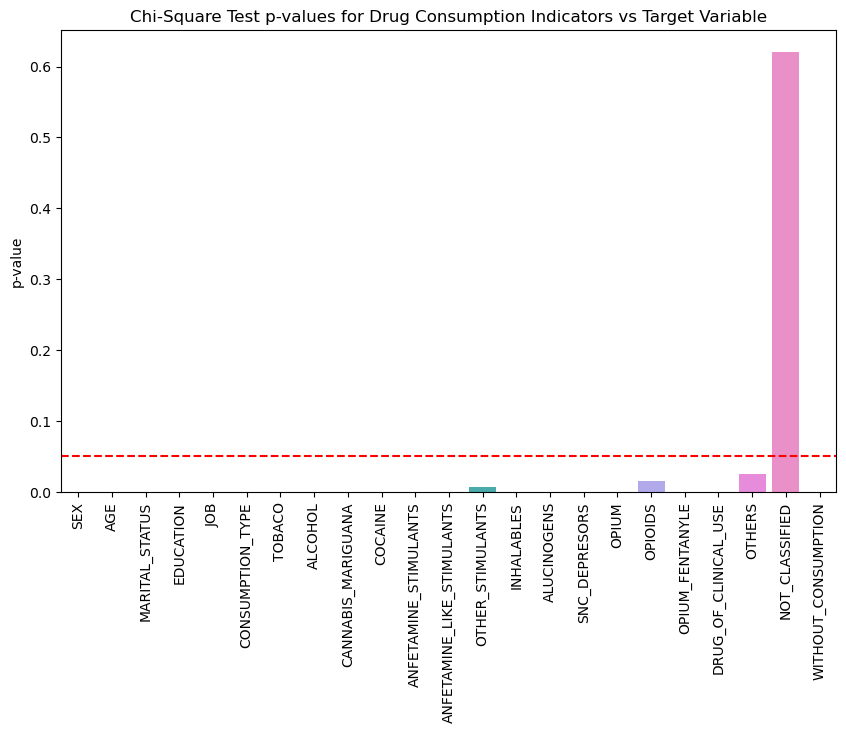

In [19]:
# Convert the TARGET column to a categorical type:
cleaned_df_subset['TARGET'] = cleaned_df_subset['TARGET'].astype('category')

chi2_results = chi_square_test(cleaned_df_subset, boolean_columns, 'TARGET')

# Convert results to DataFrame for better visualization:
chi2_results_df = pd.DataFrame.from_dict(chi2_results, orient='index', columns=['p_value'])

# Display the p-values:
print(chi2_results_df)

# Visualize the p-values:
plt.figure(figsize=(10, 6))
sns.barplot(x=chi2_results_df.index, y=chi2_results_df['p_value'])
plt.axhline(0.05, color='red', linestyle='--')  # 0.05 significance level
plt.xticks(rotation=90)
plt.title('Chi-Square Test p-values for Drug Consumption Indicators vs Target Variable')
plt.ylabel('p-value')
plt.show()

As we can see, all p-values are well bellow 5% except for not_classified drugs. Thus, there is a clear dependance on the features and the target. This has been backed by the p-values of each evaluated feature. We can now use Cramer’s V test which is calculated using the test statistic, the degree of freedom and the dimensions of the contingency table. The result from the test will suggest a strong correlation for any value greater than 0.9.

In [20]:
#  We will remove the not_classified column:
modeling_set = cleaned_df_subset.drop("NOT_CLASSIFIED", axis='columns')

                            Cramér's V
SEX                           0.465523
AGE                           0.171461
MARITAL_STATUS                0.168415
EDUCATION                     0.126622
JOB                           0.187917
CONSUMPTION_TYPE              0.551702
TOBACO                        0.397483
ALCOHOL                       0.423556
CANNABIS_MARIGUANA            0.541586
COCAINE                       0.342753
ANFETAMINE_STIMULANTS         0.056301
ANFETAMINE_LIKE_STIMULANTS    0.459970
OTHER_STIMULANTS              0.039234
INHALABLES                    0.195272
ALUCINOGENS                   0.167905
SNC_DEPRESORS                 0.158128
OPIUM                         0.108532
OPIOIDS                       0.035463
OPIUM_FENTANYLE               0.053796
DRUG_OF_CLINICAL_USE          0.050554
OTHERS                        0.032547
WITHOUT_CONSUMPTION           0.706706


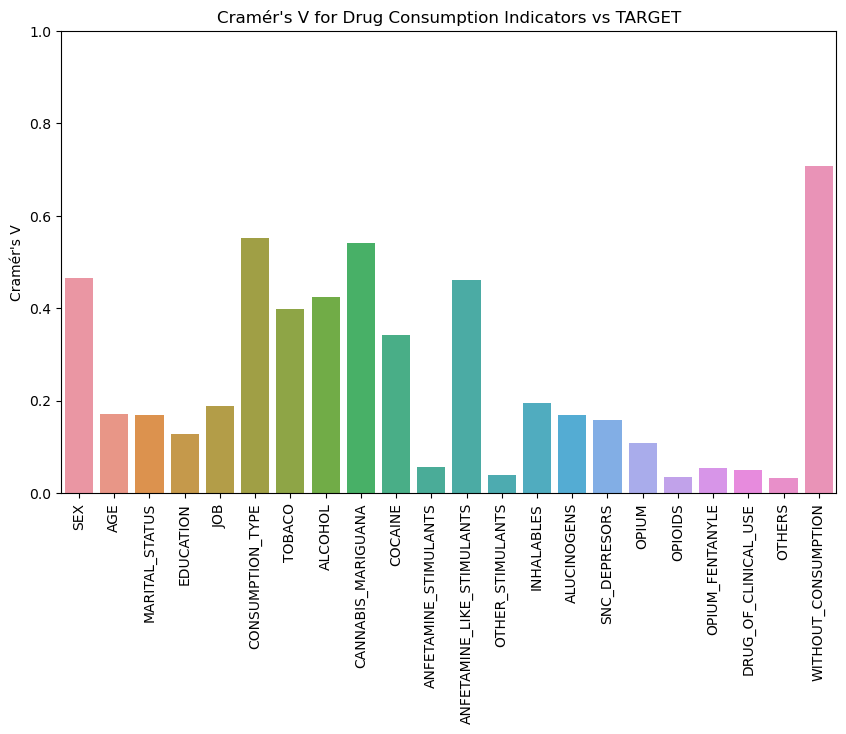

In [21]:
# Calculating Cramer's V:

# Convert the TARGET column to a categorical type:
modeling_set['TARGET'] = modeling_set['TARGET'].astype('category')

# Define the boolean columns related to drug consumption
boolean_columns = ['SEX', 'AGE', 'MARITAL_STATUS', 'EDUCATION',
       'JOB', 'CONSUMPTION_TYPE', 'TOBACO', 'ALCOHOL', 'CANNABIS_MARIGUANA',
       'COCAINE', 'ANFETAMINE_STIMULANTS', 'ANFETAMINE_LIKE_STIMULANTS',
       'OTHER_STIMULANTS', 'INHALABLES', 'ALUCINOGENS', 'SNC_DEPRESORS',
       'OPIUM', 'OPIOIDS', 'OPIUM_FENTANYLE', 'DRUG_OF_CLINICAL_USE', 'OTHERS', 'WITHOUT_CONSUMPTION']

# Function to calculate Cramer's V:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Calculate Cramer's V for each indicator:
cramers_v_results = {}
for col in boolean_columns:
    contingency_table = pd.crosstab(modeling_set[col], modeling_set['TARGET'])
    cramers_v_results[col] = cramers_v(contingency_table)

# Convert results to DataFrame for better visualization:
cramers_v_df = pd.DataFrame.from_dict(cramers_v_results, orient='index', columns=['Cramér\'s V'])

print(cramers_v_df)

# Visualize values:
plt.figure(figsize=(10, 6))
sns.barplot(x=cramers_v_df.index, y=cramers_v_df['Cramér\'s V'])
plt.xticks(rotation=90)
plt.title('Cramér\'s V for Drug Consumption Indicators vs TARGET')
plt.ylabel('Cramér\'s V')
plt.ylim(0, 1)
plt.show()

As we can see, the features of more correlation to our target variables in descending order are:
- WITHOUT_CONSUMPTION
- CONSUMPTION_TYPE
- CANABIS_MARIGUANA
- SEX
- ANFETAMINE_LIKE_STIMULANTS
- TOBACO
- ALCOHOL
- COCAINE

Therefore, we will use these features for our model.

In [22]:
columns_to_keep = [
    'SEX',
    'CONSUMPTION_TYPE',
    'WITHOUT_CONSUMPTION',
    'CANNABIS_MARIGUANA',
    'ANFETAMINE_LIKE_STIMULANTS',
    'TOBACO',
    'ALCOHOL',
    'COCAINE',
    'TARGET'
    ]

modeling_df = modeling_set[columns_to_keep]
modeling_df.head(5)

,SEX,CONSUMPTION_TYPE,WITHOUT_CONSUMPTION,CANNABIS_MARIGUANA,ANFETAMINE_LIKE_STIMULANTS,TOBACO,ALCOHOL,COCAINE,TARGET
0,HOMBRE,FUNCIONAL,0,1,1,1,1,0,DROGAS
1,MUJER,FUNCIONAL,0,0,1,0,1,0,DROGAS
2,MUJER,SIN CONSUMO,1,0,0,0,0,0,ANSIEDAD
3,HOMBRE,FUNCIONAL,0,1,0,1,1,0,DROGAS
8,MUJER,SIN CONSUMO,0,0,0,1,1,0,DEPRESION


In [23]:
modeling_df['CONSUMPTION_TYPE'].unique()

array(['FUNCIONAL', 'SIN CONSUMO', 'EN REMISION', 'EXPERIMENTADOR',
       'SOCIAL', 'DISFUNCIONAL'], dtype=object)

## Modeling 2.1 - Trying different models

In this section we will try different models, explain the steps followed and chose one particular algorithm and hyperparameters.

In [24]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

import pickle

In [25]:
# Define features and target
X = modeling_df.drop('TARGET', axis=1)
y = modeling_df['TARGET']

# Preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['WITHOUT_CONSUMPTION', 'CANNABIS_MARIGUANA', 'ANFETAMINE_LIKE_STIMULANTS', 'TOBACO', 'ALCOHOL', 'COCAINE']),
        ('cat', OneHotEncoder(), ['CONSUMPTION_TYPE', 'SEX'])
    ])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the preprocessor on the training data
preprocessor.fit(X_train)

# Define classifiers and their respective parameter grids
param_grids = {
    'Logistic Regression': {
        'classifier__penalty': ['l1', 'l2'],
        'classifier__C': [0.01, 0.1, 1, 10, 100],
        'classifier__solver': ['liblinear', 'saga']
    },
    'Decision Tree': {
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__max_depth': [None, 10, 20, 30, 40, 50],
        'classifier__min_samples_split': [2, 10, 20],
        'classifier__min_samples_leaf': [1, 5, 10]
    },
    'Random Forest': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__max_depth': [None, 10, 20, 30, 40, 50],
        'classifier__min_samples_split': [2, 10, 20],
        'classifier__min_samples_leaf': [1, 5, 10]
    },
    'SVM': {
        'classifier__C': [0.01, 0.1, 1, 10, 100],
        'classifier__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'classifier__gamma': ['scale', 'auto']
    },
    'KNN': {
        'classifier__n_neighbors': [3, 5, 7, 9, 11],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__metric': ['euclidean', 'manhattan', 'minkowski']
    },
    'Naive Bayes': {
        'classifier__var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]
    }
}

# Define classifiers to test
classifiers = {
    'Logistic Regression': LogisticRegression(multi_class='multinomial', solver='saga'),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Loop over classifiers and perform Grid Search
best_estimators_first_trial = {}
for name, clf in classifiers.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', clf)])
    param_grid = param_grids[name]
    grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_estimators_first_trial[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy for {name}: {grid_search.best_score_:.4f}")
    print("="*60)

# Evaluate the best estimator on the test set
for name, estimator in best_estimators_first_trial.items():
    y_pred = estimator.predict(X_test)
    print(f"Classifier: {name}")
    print(classification_report(y_test, y_pred))
    print("="*60)

/Users/carlosvarela/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/carlosvarela/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/carlosvarela/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/carlosvarela/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/carlosvarela/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reac

Best parameters for Logistic Regression: {'classifier__C': 0.01, 'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
Best cross-validation accuracy for Logistic Regression: 0.8006
Best parameters for Decision Tree: {'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 10, 'classifier__min_samples_split': 2}
Best cross-validation accuracy for Decision Tree: 0.7997
Best parameters for Random Forest: {'classifier__criterion': 'gini', 'classifier__max_depth': None, 'classifier__min_samples_leaf': 10, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best cross-validation accuracy for Random Forest: 0.8046
Best parameters for SVM: {'classifier__C': 1, 'classifier__gamma': 'auto', 'classifier__kernel': 'poly'}
Best cross-validation accuracy for SVM: 0.8043
Best parameters for KNN: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 11, 'classifier__weights': 'uniform'}
Best cross-validation accuracy for KNN: 0.78

/Users/carlosvarela/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/carlosvarela/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/carlosvarela/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the data using the preprocessor
X_train = preprocessor.fit_transform(pd.DataFrame(X_train, columns=X.columns))
X_test = preprocessor.transform(pd.DataFrame(X_test, columns=X.columns))

# Encode the target variable
target_encoder = OneHotEncoder()
y_train = target_encoder.fit_transform(y_train.values.reshape(-1, 1)).toarray()
y_test = target_encoder.transform(y_test.values.reshape(-1, 1)).toarray()

# Define the neural network model
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

print(classification_report(y_test_classes, y_pred_classes, target_names=target_encoder.categories_[0]))


Epoch 1/50


/Users/carlosvarela/anaconda3/envs/data_science/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6701 - loss: 0.7855 - val_accuracy: 0.8044 - val_loss: 0.5196
Epoch 2/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 590us/step - accuracy: 0.7765 - loss: 0.5430 - val_accuracy: 0.8044 - val_loss: 0.5164
Epoch 3/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - accuracy: 0.7914 - loss: 0.5355 - val_accuracy: 0.8081 - val_loss: 0.5160
Epoch 4/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step - accuracy: 0.7887 - loss: 0.5395 - val_accuracy: 0.8081 - val_loss: 0.5163
Epoch 5/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 578us/step - accuracy: 0.7884 - loss: 0.5122 - val_accuracy: 0.8081 - val_loss: 0.5102
Epoch 6/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.7972 - loss: 0.4898 - val_accuracy: 0.8081 - val_loss: 0.5131
Epoch 7/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step - accuracy: 0.8118 - loss: 0.4831 - val_accuracy: 0.8081 - val_loss: 0.5133
Epoch 8/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 581us/step - accuracy: 0.8148 - loss: 0.4866 - val_accuracy:

/Users/carlosvarela/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/carlosvarela/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/carlosvarela/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

## Modeling 2.1 - Handling Imbalanced Data & Inspecting Final Results

**Key Considerations**

Accuracy:

- All models except KNN and Naive Bayes achieve an accuracy of 0.80 on the test set.
- Random Forest has the highest cross-validation accuracy (0.8046), closely followed by SVM (0.8043) and Logistic Regression (0.8006).

Class Imbalance:

- Macro average F1-score is low for all models, indicating poor performance on minority classes. 
- The class distribution might be imbalanced given the low performance on the 'ANSIEDAD' class.

In [27]:
modeling_df['TARGET'].value_counts()

TARGET
DROGAS       3380
DEPRESION    1009
ANSIEDAD      690
Name: count, dtype: int64

Given the slight class imbalance for the ANSIEDAD class, we will perform SMOTE dat aaugmentation to try to account for this imbalance. Finally, we will try modeling again.

In [28]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Define features and target:
X = modeling_df.drop('TARGET', axis=1)
y = modeling_df['TARGET']

# Preprocessing for categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['WITHOUT_CONSUMPTION', 'CANNABIS_MARIGUANA', 'ANFETAMINE_LIKE_STIMULANTS', 'TOBACO', 'ALCOHOL', 'COCAINE']),
        ('cat', OneHotEncoder(), ['CONSUMPTION_TYPE', 'SEX'])
    ])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define classifiers and their respective parameter grids
param_grids = {
    'Logistic Regression': {
        'classifier__penalty': ['l1', 'l2'],
        'classifier__C': [0.01, 0.1, 1, 10, 100],
        'classifier__solver': ['liblinear', 'saga']  # 'saga' supports l1, l2, and elasticnet
    },
    'Decision Tree': {
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__max_depth': [None, 10, 20, 30, 40, 50],
        'classifier__min_samples_split': [2, 10, 20],
        'classifier__min_samples_leaf': [1, 5, 10]
    },
    'Random Forest': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__max_depth': [None, 10, 20, 30, 40, 50],
        'classifier__min_samples_split': [2, 10, 20],
        'classifier__min_samples_leaf': [1, 5, 10]
    },
    'SVM': {
        'classifier__C': [0.01, 0.1, 1, 10, 100],
        'classifier__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
        'classifier__gamma': ['scale', 'auto']
    },
    'KNN': {
        'classifier__n_neighbors': [3, 5, 7, 9, 11],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__metric': ['euclidean', 'manhattan', 'minkowski']
    },
    'Naive Bayes': {
        'classifier__var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05]
    }
}

# Define classifiers to test
classifiers = {
    'Logistic Regression': LogisticRegression(multi_class='multinomial', solver='saga'),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB()
}

# Employing the same pipeline as before:
best_estimators = {}
for name, clf in classifiers.items():
    # Applying SMOTE for the minority class:
    pipe = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),# setting seed..
        ('classifier', clf)
    ])
    param_grid = param_grids[name]
    grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_estimators[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy for {name}: {grid_search.best_score_:.4f}")
    print("="*60)

# Evaluate the best estimator on the test set
for name, estimator in best_estimators.items():
    y_pred = estimator.predict(X_test)
    print(f"Classifier: {name}")
    print(classification_report(y_test, y_pred))
    print("="*60)

/Users/carlosvarela/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/carlosvarela/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/carlosvarela/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/carlosvarela/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/carlosvarela/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reac

Best parameters for Logistic Regression: {'classifier__C': 0.01, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}
Best cross-validation accuracy for Logistic Regression: 0.7775
Best parameters for Decision Tree: {'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 5, 'classifier__min_samples_split': 2}
Best cross-validation accuracy for Decision Tree: 0.7723
Best parameters for Random Forest: {'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 10, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 50}
Best cross-validation accuracy for Random Forest: 0.7837
Best parameters for SVM: {'classifier__C': 0.01, 'classifier__gamma': 'auto', 'classifier__kernel': 'sigmoid'}
Best cross-validation accuracy for SVM: 0.7900
Best parameters for KNN: {'classifier__metric': 'manhattan', 'classifier__n_neighbors': 11, 'classifier__weights': 'distance'}
Best cross-validation accuracy for KNN: 0.

It appears that the unbalanced set yielded better results. Therefore, we will keep using the initial models.

From the results obtained, the best model to use is:

**Naive Bayes Classifier (Imablanced Set)**
- Overall Accuracy: 0.80

**Precision, Recall, F1-Score:**
- ANXIETY: 
    - Precision: 0.43
    - Recall: 0.02
    - F1-Score: 0.04
- DEPRESSION:
    - Precision: 0.55
    - Recall: 0.77
    - F1-Score: 0.64
- DROGAS:
    - Precision: 0.90
    - Recall: 0.96
    - F1-Score: 0.93
- Macro Average:
    - Precision: 0.62
    - Recall: 0.58
    - F1-Score: 0.54
- Weighted Average:
    - Precision: 0.77
    - Recall: 0.80
    - F1-Score: 0.75

**Hyperparameters:**
- Best parameters for Naive Bayes: {'classifier__var_smoothing': 1e-09}
- Best cross-validation accuracy for Naive Bayes: 0.80

**Justification**

1. The Naive Bayes classifier achieved an overall accuracy of 80%, which was comparable to other classifiers. This level of accuracy indicates that the model performs well on the majority of the test set.

2. Despite the imbalanced nature of the dataset, Naive Bayes was able to maintain reasonable performance. This is partly due to its probabilistic nature, which allows it to handle imbalances by considering the likelihood of each class given the features.

3. Naive Bayes classifiers are known for their simplicity and ease of implementation. They are based on Bayes' theorem and assume independence between features. This makes them highly interpretable and straightforward to understand, which is beneficial when explaining the model's predictions to stakeholders.

4. While the precision and recall for the ANXIETY class were low, the Naive Bayes classifier still provided valuable insights. For the DEPRESSION class, the model achieved a recall of 77%, indicating it was effective at identifying most cases of depression.

5. Naive Bayes classifiers are computationally efficient and require less training time compared to more complex models like SVMs or Random Forests. This makes them suitable for real-time applications or when computational resources are limited.]

## Modeling 2.2 - Saving the model

In [29]:
import pickle

# Save the best Naive Bayes model to a pickle file:
naive_bayes_model = best_estimators_first_trial['Naive Bayes']
with open('naive_bayes_model.pkl', 'wb') as file:
    pickle.dump(naive_bayes_model, file)

In [36]:
import string
import random

# Create csv samples from the test set:
csv_samples = X_test.head(50)
csv_samples['TARGET'] = y_test.head(50)

# Function to generate a unique string ID:
def generate_id(length=11):
    letters_and_digits = string.ascii_letters + string.digits
    return ''.join(random.choices(letters_and_digits, k=length))

# Generate unique string IDs:
num_samples = len(csv_samples)
string_ids = [generate_id() for _ in range(num_samples)]

# Add the string IDs to the DataFrame:
csv_samples['id'] = string_ids

# Reorder columns to place 'id' at the beginning:
csv_samples = csv_samples[['id'] + [col for col in csv_samples.columns if col != 'id']]

# Save to CSV:
csv_samples.to_csv('test_samples.csv', index=False)

/var/folders/p7/0l629d4j6wxccht_62k8btmr0000gn/T/ipykernel_2738/2023704471.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csv_samples['TARGET'] = y_test.head(50)
/var/folders/p7/0l629d4j6wxccht_62k8btmr0000gn/T/ipykernel_2738/2023704471.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csv_samples['id'] = string_ids
